<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
دوچرخه‌سواران
</font>
</h1>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
دوچرخه‌سواران (🚴) خیلی روی دما حساس هستند. دمایی که دوچرخه‌سواران احساس می‌کنند معمولاً با سرعت باد و رطوبت هوا رابطه‌ی مستقیم دارد. 
در این تمرین مجموعه‌داده‌ای مرتبط با این موضوع در اختیارمان قرار گرفته و قصد داریم به تحلیل اکتشافی آن بپردازیم.
</font>
</p>


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مجموعه‌داده
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در فایل <code>bikes_borrowed.csv</code>، اطلاعات مربوط به دوچرخه‌های اجاره داده‌شده در یک شهر و اطلاعات مربوط به شرایط هوا در آن روز ذخیره شده است. ستون‌های این مجموعه‌داده در جدول زیر شرح داده شده است.
با استفاده از روش‌هایی که در درسنامه یاد گرفته‌اید، به‌کمک کتابخانه‌ی <code>pandas</code> این مجموعه‌داده را از فایل بارگیری کرده و در دیتافریم <code>df</code> ذخیره کنید.
</font>
</p>


<center>
<div dir=rtl style="direction: rtl;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>

| <b>شماره گروه</b> | <b>توضیحات</b> |
| :---: | :---: |
| <code>cnt</code> | تعداد دوچرخه‌های اجاره‌داده‌شده در روز |
| <code>t1</code> | دمای واقعی اندازه‌گیری‌شده در آن روز |
| <code>t2</code> | میانگین دمایی که دوچرخه‌سواران احساس کرده‌اند |
| <code>humidity</code> | رطوبت هوا در آن روز |
| <code>wind_speed</code> | سرعت باد در آن روز |
|‌ <code>is_weekend</code> | آیا آن روز،‌ روز غیرکاری (آخر هفته) هست یا خیر |
| <code>season</code> | چندمین فصل سال |
| <code>cloud</code> | آیا هوا در آن روز ابری هست یا خیر  |

</font>
</div>
</center>

In [2]:
import pandas as pd
import numpy as np
from numpy import nan as NA

df = pd.read_csv('bikes_borrowed.csv')
df.head()

,cnt,t1,t2,humidity,wind_speed,is_weekend,season,cloud
0,182,3.0,2.0,93.0,6.0,1,3,0.0
1,138,3.0,2.5,93.0,5.0,1,3,NaN
2,134,2.5,2.5,96.5,0.0,1,3,NaN
3,72,2.0,2.0,100.0,0.0,1,3,1.0
4,47,2.0,0.0,93.0,6.5,1,3,NaN


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
همان‌طور که گفتیم، تابع
<code>head</code>
به‌طور پیش‌فرض، ۵ ردیف نخست دیتافریم را به ما نشان می‌دهد.
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مقادیر گم‌شده
</font>
</h2>


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
همان‌طور که از ردیف‌های نخست دیتافریم مشخص است، این مجموعه‌داده شامل تعدادی مقادیر گم‌شده است. در این بخش سعی می‌کنیم به روش‌های مختلفی، این مقادیر گم‌شده را مدیریت کنیم.
<br>
ابتدا برسی کنید که چند درصد از مقادیر هر ستون گم‌شده است. اگر تعداد زیادی از مقادیر یک ستون گم‌شده باشند احتمالاً آن ستون اطلاعات زیادی برای‌مان فراهم نمی‌کند، بنابراین می‌توانیم آن را ‌به‌طور کلی حذف کنیم.
</font>
</p>


In [7]:
missing_percentages = df.isnull().mean()
print(missing_percentages)

cnt           0.000000
t1            0.000287
t2            0.000287
humidity      0.098771
wind_speed    0.000287
is_weekend    0.000000
season        0.000000
cloud         0.948949
dtype: float64


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حال آن ستونی را که تعداد مقادیر گم‌شده‌اش بسیار زیاد است
(بیش از ۹۰ درصد)
را حذف کنید.
</font>
</p>

<details dir="rtl" style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<summary dir="rtl" style="color:orange"><b>راهنمایی: نحوه‌ی حذف یک ستون</b></summary>

برای این کار می‌توانید همچون کد زیر از دستور
<code>drop</code>
استفاده کنید.

<span dir=ltr style="direction:ltr;">

`df.drop(columns = list_of_column_names, inplace = True)`

</span>
</details>

In [8]:
df.drop(columns = missing_percentages[missing_percentages > 0.9].index, inplace = True)

df.head()

,cnt,t1,t2,humidity,wind_speed,is_weekend,season
0,182,3.0,2.0,93.0,6.0,1,3
1,138,3.0,2.5,93.0,5.0,1,3
2,134,2.5,2.5,96.5,0.0,1,3
3,72,2.0,2.0,100.0,0.0,1,3
4,47,2.0,0.0,93.0,6.5,1,3


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    به پارامتر <code>inplace = True</code> دقت کنید؛ وجود این پارامتر باعث می‌شود که تابع <code>drop</code>، به‌جای آن‌که یک کپی از دیتافریم تهیه کرده و بعد از اعمال تغییرات آن کپی را خروجی دهد، تغییرات را مستقیماً روی دیتافریم اصلی اعمال کند.
برای درک بهتر این موضوع می‌توانید یک‌بار این پارامتر را حذف کرده و سپس مجدد <code dir=ltr>df.head()</code> را خروجی بگیرید و بررسی کنید که آیا نام ستون‌ها تغییر کرده است یا خیر؟
</font>
</p>


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حال با توجه به محاسبه‌ی درصد مقادیر گم‌شده در هر ستون می‌دانیم که ستون
<code>humidity</code>
هم تعداد قابل توجهی مقادیر گم‌شده دارد. برای حل این مشکل می‌خواهیم این مقادیر را با مقدار میانگین
<code>humidity</code>
جایگزین کنیم.
<br>
</font>
</p>

<details dir="rtl" style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<summary dir="rtl" style="color:orange"><b>راهنمایی: نحوه‌ی میانگین‌گیری و پر کردن مقادیر گم‌شده</b></summary>

برای انجام این کار به کد زیر توجه کنید:

<span dir=ltr style="direction:ltr;">

`mean = df['column_name'].mean()`
<br>

`df['column_name'].fillna(mean.astype('int64'), inplace = True)`

</span>
</details>

In [9]:
mean = df['humidity'].mean()
df['humidity'].fillna(mean.astype('int64'), inplace=True)

C:\Users\Sahar Ramezani\AppData\Local\Temp\ipykernel_21560\2719799077.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['humidity'].fillna(mean.astype('int64'), inplace=True)


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در انتها با توجه به این موضوع که باقی ستون‌ها تعداد بسیار اندکی مقادیر گم‌شده دارند، تمامی نمونه‌ها/ردیف‌هایی را که همچنان مقدار گم‌شده دارند حذف می‌کنیم.
</font>
</p>

<details dir="rtl" style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<summary dir="rtl" style="color:orange"><b>راهنمایی: نحوه‌ی حذف مقادیر گم‌شده</b></summary>

برای انجام این کار به کد زیر توجه کنید:

<span dir=ltr style="direction:ltr;">

`df.dropna(inplace = True)`

</span>
</details>

In [10]:
df.dropna(inplace = True)

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    همان‌طور که می‌بینید نام ستون‌های <code>t1</code> و <code>t2</code> خیلی کلی است و بیانگر معنای مقدار آن‌ها نیست، به همین دلیل خوب است تا نام آن‌ها را تغییر دهیم.
<br>
    در سلول زیر، نام ستون <code>t1</code> را به <code>t_real</code> و نام ستون <code>t2</code> را به <code>t_feels_like</code> تغییر دهید.
</font>
</p>



<details dir="rtl" style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<summary dir="rtl" style="color:orange"><b>راهنمایی: نحوه‌ی تغییر نام نمایه‌ها یا ستون‌ها</b></summary>

برای تغییر نام نمایه‌ها یا ستون‌ها می‌توانیم از تابع <code>rename</code> استفاده کنیم:

<span dir=ltr style="direction:ltr;">

`df.rename(columns={"col1": "new_col1", "col2": "new_col2"} , inplace = True)`

</span>
</details>

In [11]:
df.rename(columns={"t1": "t_real", "t2": "t_feels_like"}, inplace = True)
df.head()

,cnt,t_real,t_feels_like,humidity,wind_speed,is_weekend,season
0,182,3.0,2.0,93.0,6.0,1,3
1,138,3.0,2.5,93.0,5.0,1,3
2,134,2.5,2.5,96.5,0.0,1,3
3,72,2.0,2.0,100.0,0.0,1,3
4,47,2.0,0.0,93.0,6.5,1,3


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
اکتشاف در داده   </font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
برای برسی داده ابتدا از
<code>
describe
</code>
استفاده می‌کنیم تا کلیتی از داده را متوجه شویم.
</font>
</p>

In [12]:
df.describe()

,cnt,t_real,t_feels_like,humidity,wind_speed,is_weekend,season
count,17409.000000,17409.000000,17409.000000,17409.000000,17409.000000,17409.000000,17409.000000
mean,1143.131311,12.469633,11.522622,72.279755,15.914560,0.285485,1.491872
std,1084.840175,5.570946,6.614235,13.598632,7.895017,0.451658,1.118833
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,64.500000,10.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,72.000000,15.000000,0.000000,1.000000
75%,1672.000000,16.000000,16.000000,82.000000,20.500000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,1.000000,3.000000


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حال با استفاده از
<code> plt.scatter </code>
برسی میکنیم که ارتباط بین
<code>t_real</code>
و
<code>t_feels_like</code>
چگونه است.
</font>
</p>

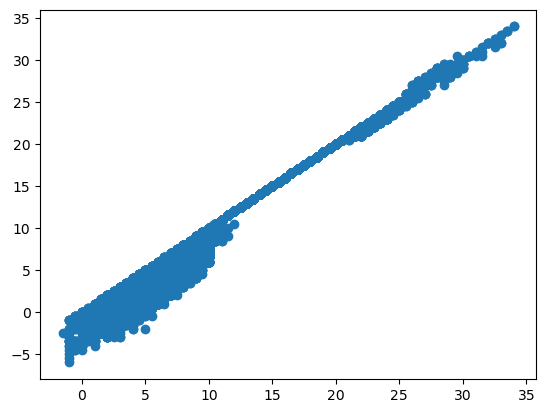

In [14]:
from matplotlib  import pyplot as plt

plt.scatter(x=df["t_real"], y=df["t_feels_like"])
plt.show()

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
همان‌طور که مشحص است و انتظارش را هم داشتیم، این دو مقدار در اکثر روزها بسیار به هم نزدیک هستند.
<br>
در مرحله‌ی بعد می‌خواهیم بدانیم ارتباط تعداد اجاره‌ی دوچرخه‌ها با دمای هوا چیست.
برای این کار ابتدا نمونه‌ها را بر اساس
<code>
t_feels_like
</code>
گروه‌بندی کرده (دستور <code>groupby</code>) و میانگین تعداد اجاره‌ی دوچرخه در هر گروه را محاسبه کنید.
</font>
</p>

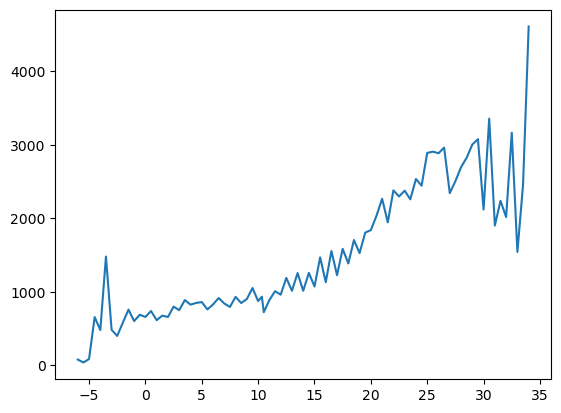

In [15]:
grouped =  df.groupby("t_feels_like")["cnt"].mean()

plt.plot(grouped)
plt.show()

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
🤔 اکنون می‌توانید به تحلیل نمودار تولیدشده بپردازید. به نظر شما چه نتیجه‌ای می‌توان از این نمودار گرفت؟ در چه روزهایی دوچرخه‌های بیشتری اجاره داده می‌شود؟ در صورت علاقه می‌توانید نظرات خود را به‌شکل دیدگاه عمومی در صفحه‌ی تمرین بنویسید.
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
نحوه‌ی داوری
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
در سامانه‌ی داوری دو دیتافریم <code>df</code> و <code>grouped</code> راه‌حل شما مورد ارزیابی قرار می‌گیرد. بنابراین نیاز است مقادیر گم‌شده را به‌درستی و طبق خواسته‌ی سوال مدیریت کرده باشید و همچنین رابطه‌ی تعداد دوچرخه‌های اجاره‌ای و دمای هوا را به‌درستی محاسبه کرده باشید.
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    برای ساخته‌شدن فایل <code>result.zip</code> سلول زیر را اجرا کنید. توجه داشته باشید که پیش از اجرای سلول زیر تغییرات اعمال شده در نت‌بوک را ذخیره کرده باشید (<code>ctrl+s</code>) تا در صورت نیاز به پشتیبانی امکان بررسی کد شما وجود داشته باشد.</font>
</p>

In [18]:
import zlib
import zipfile

df.to_csv('bikes.csv', index=True)
grouped.to_csv("cnt_mean_grouped.csv", index=True)

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)

file_names = ["cyclists.ipynb", "bikes.csv", "cnt_mean_grouped.csv"]
compress(file_names)

File Paths:
['cyclists.ipynb', 'bikes.csv', 'cnt_mean_grouped.csv']
